<a href="https://colab.research.google.com/github/akshaysingh8051/Posture_Detection_using_YOLO/blob/main/Posture_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.5/783.5 kB 4.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
#display.clear_output()
!yolo checks


Ultralytics YOLOv8.2.36 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/107.7 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.20GHz
CUDA                None

numpy               ✅ 1.25.2<2.0.0
matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 2.0.0>=2.0.0


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="sEyeyKDl1oo3yc19Vkal")
project = rf.workspace("akshaydeeplearning-q3aiz").project("posture-corrector-jhuof")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.35, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to posture-corrector-1 in yolov8:: 100%|██████████| 320/320 [00:00<00:00, 2950.82it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/posture-corrector-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

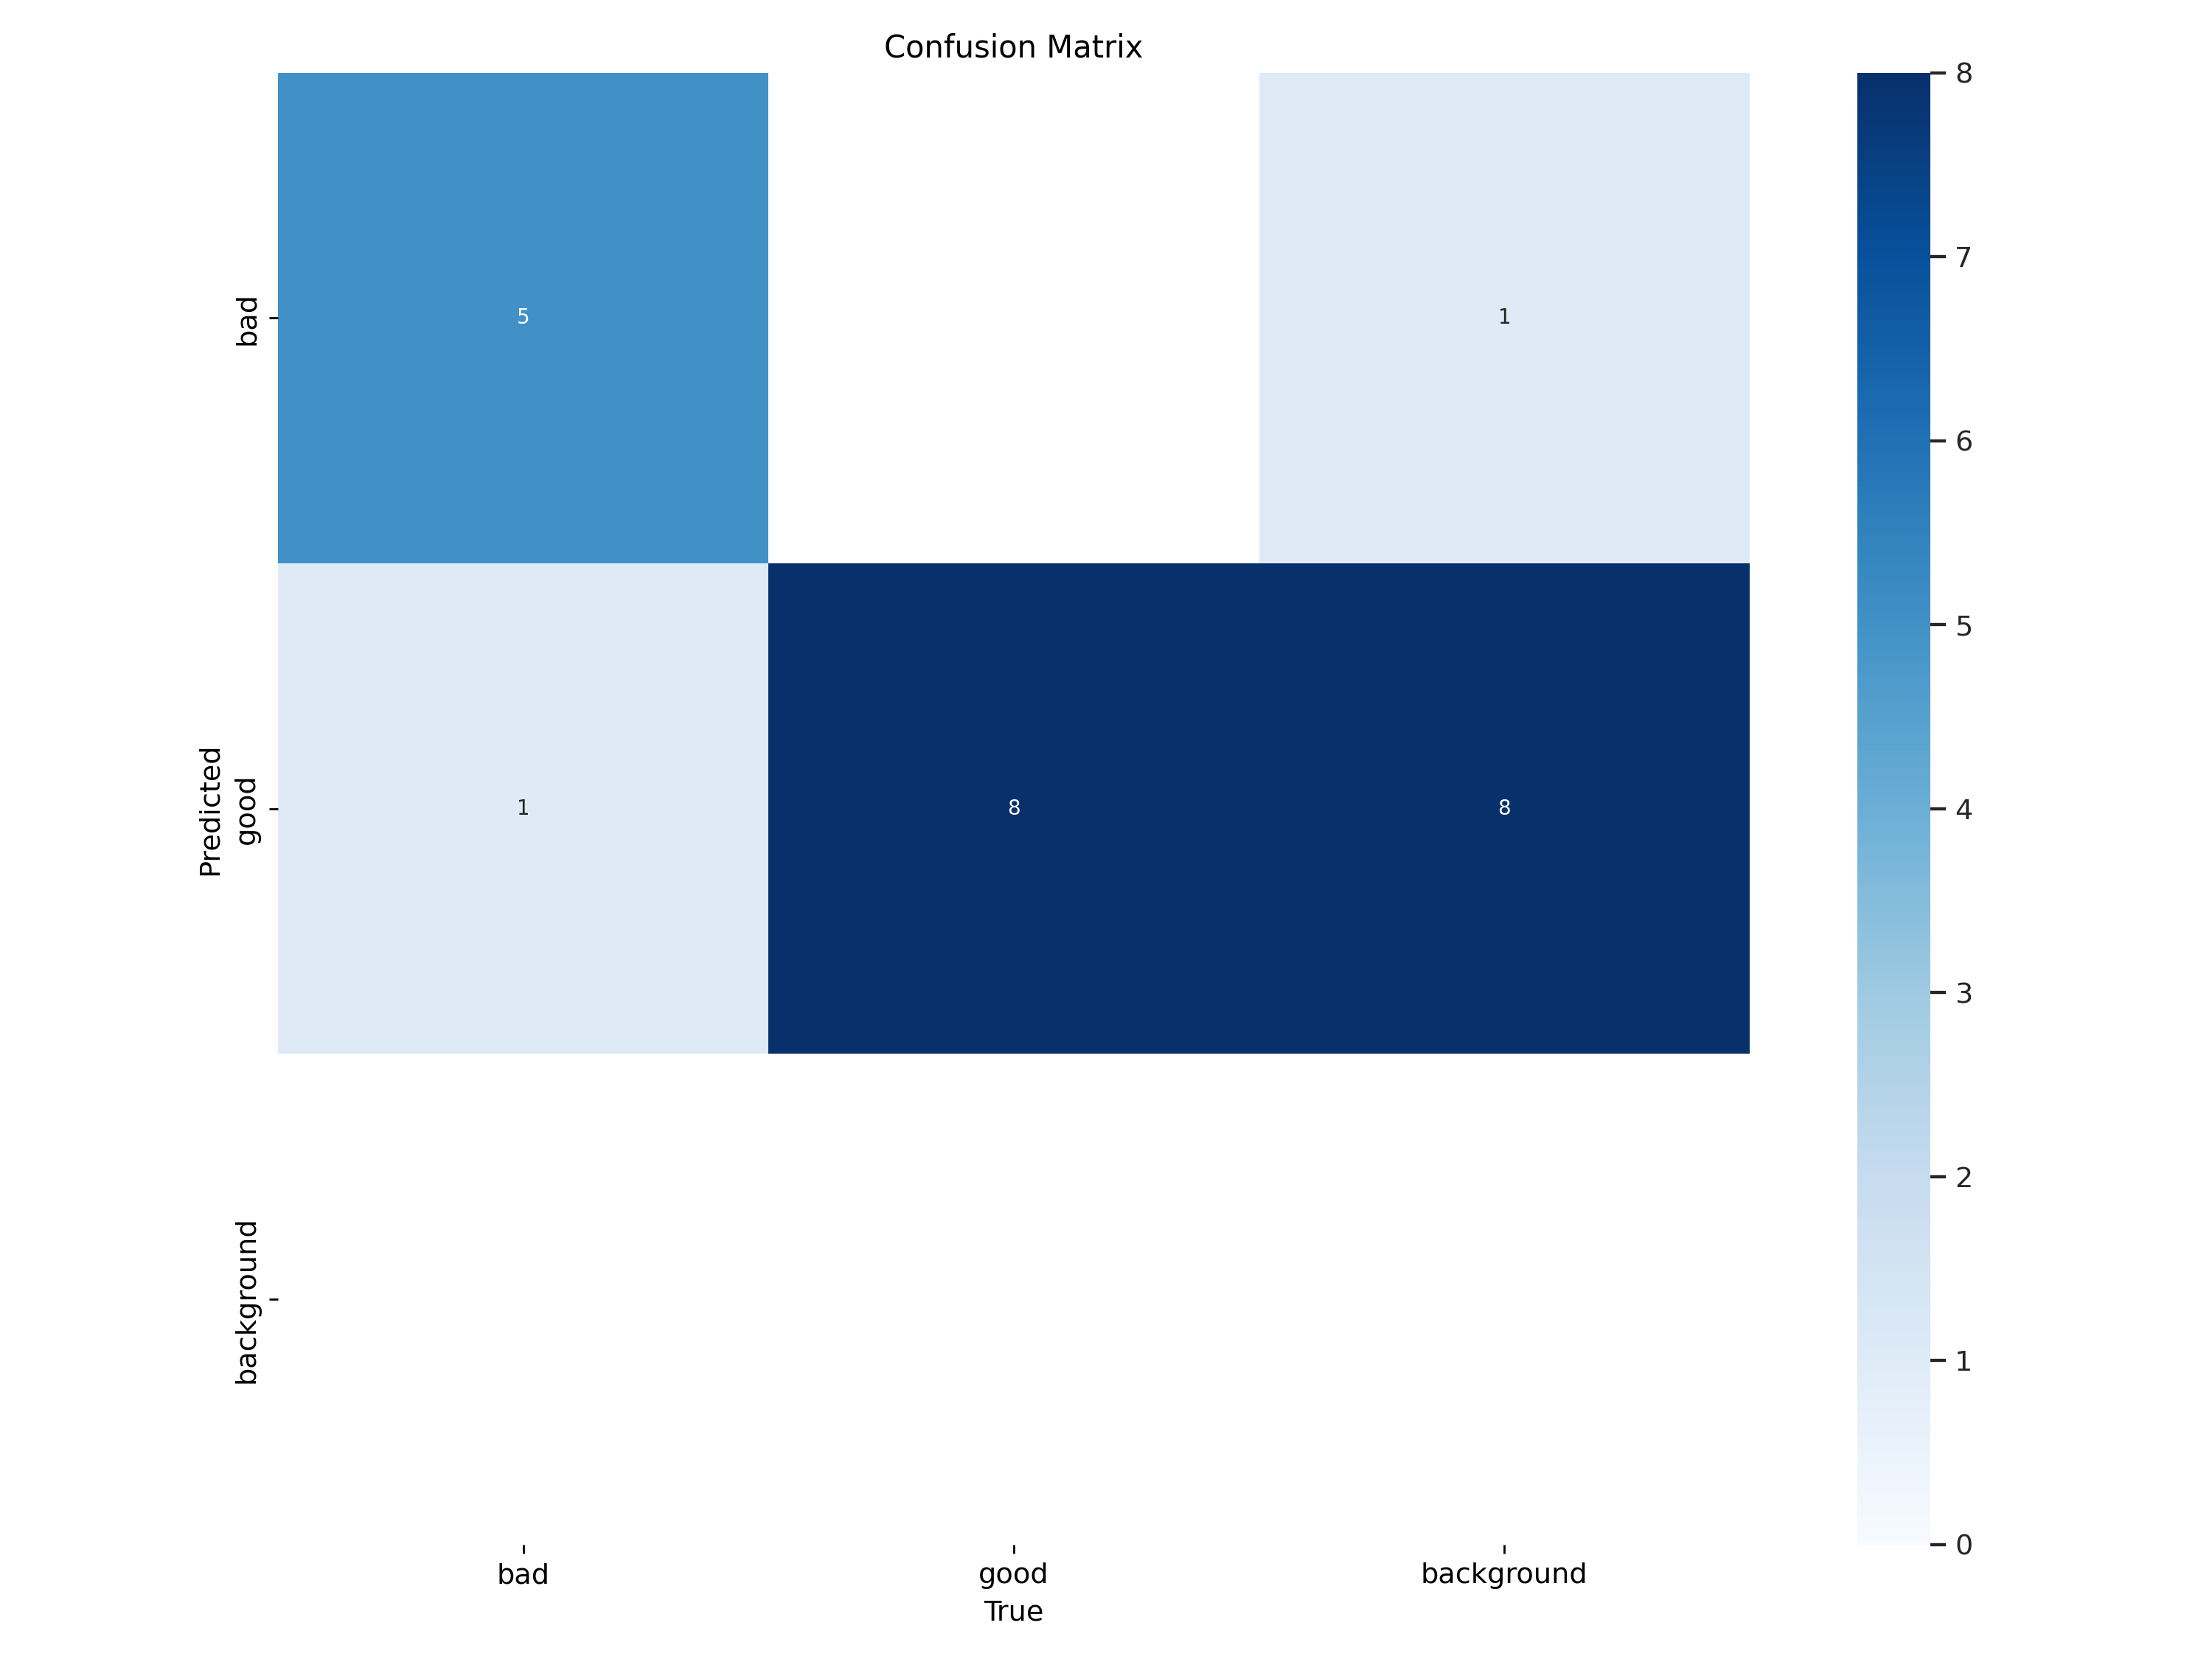

In [ ]:
Image(filename=f'/content/runs/detect/train10/confusion_matrix.png',width=600)

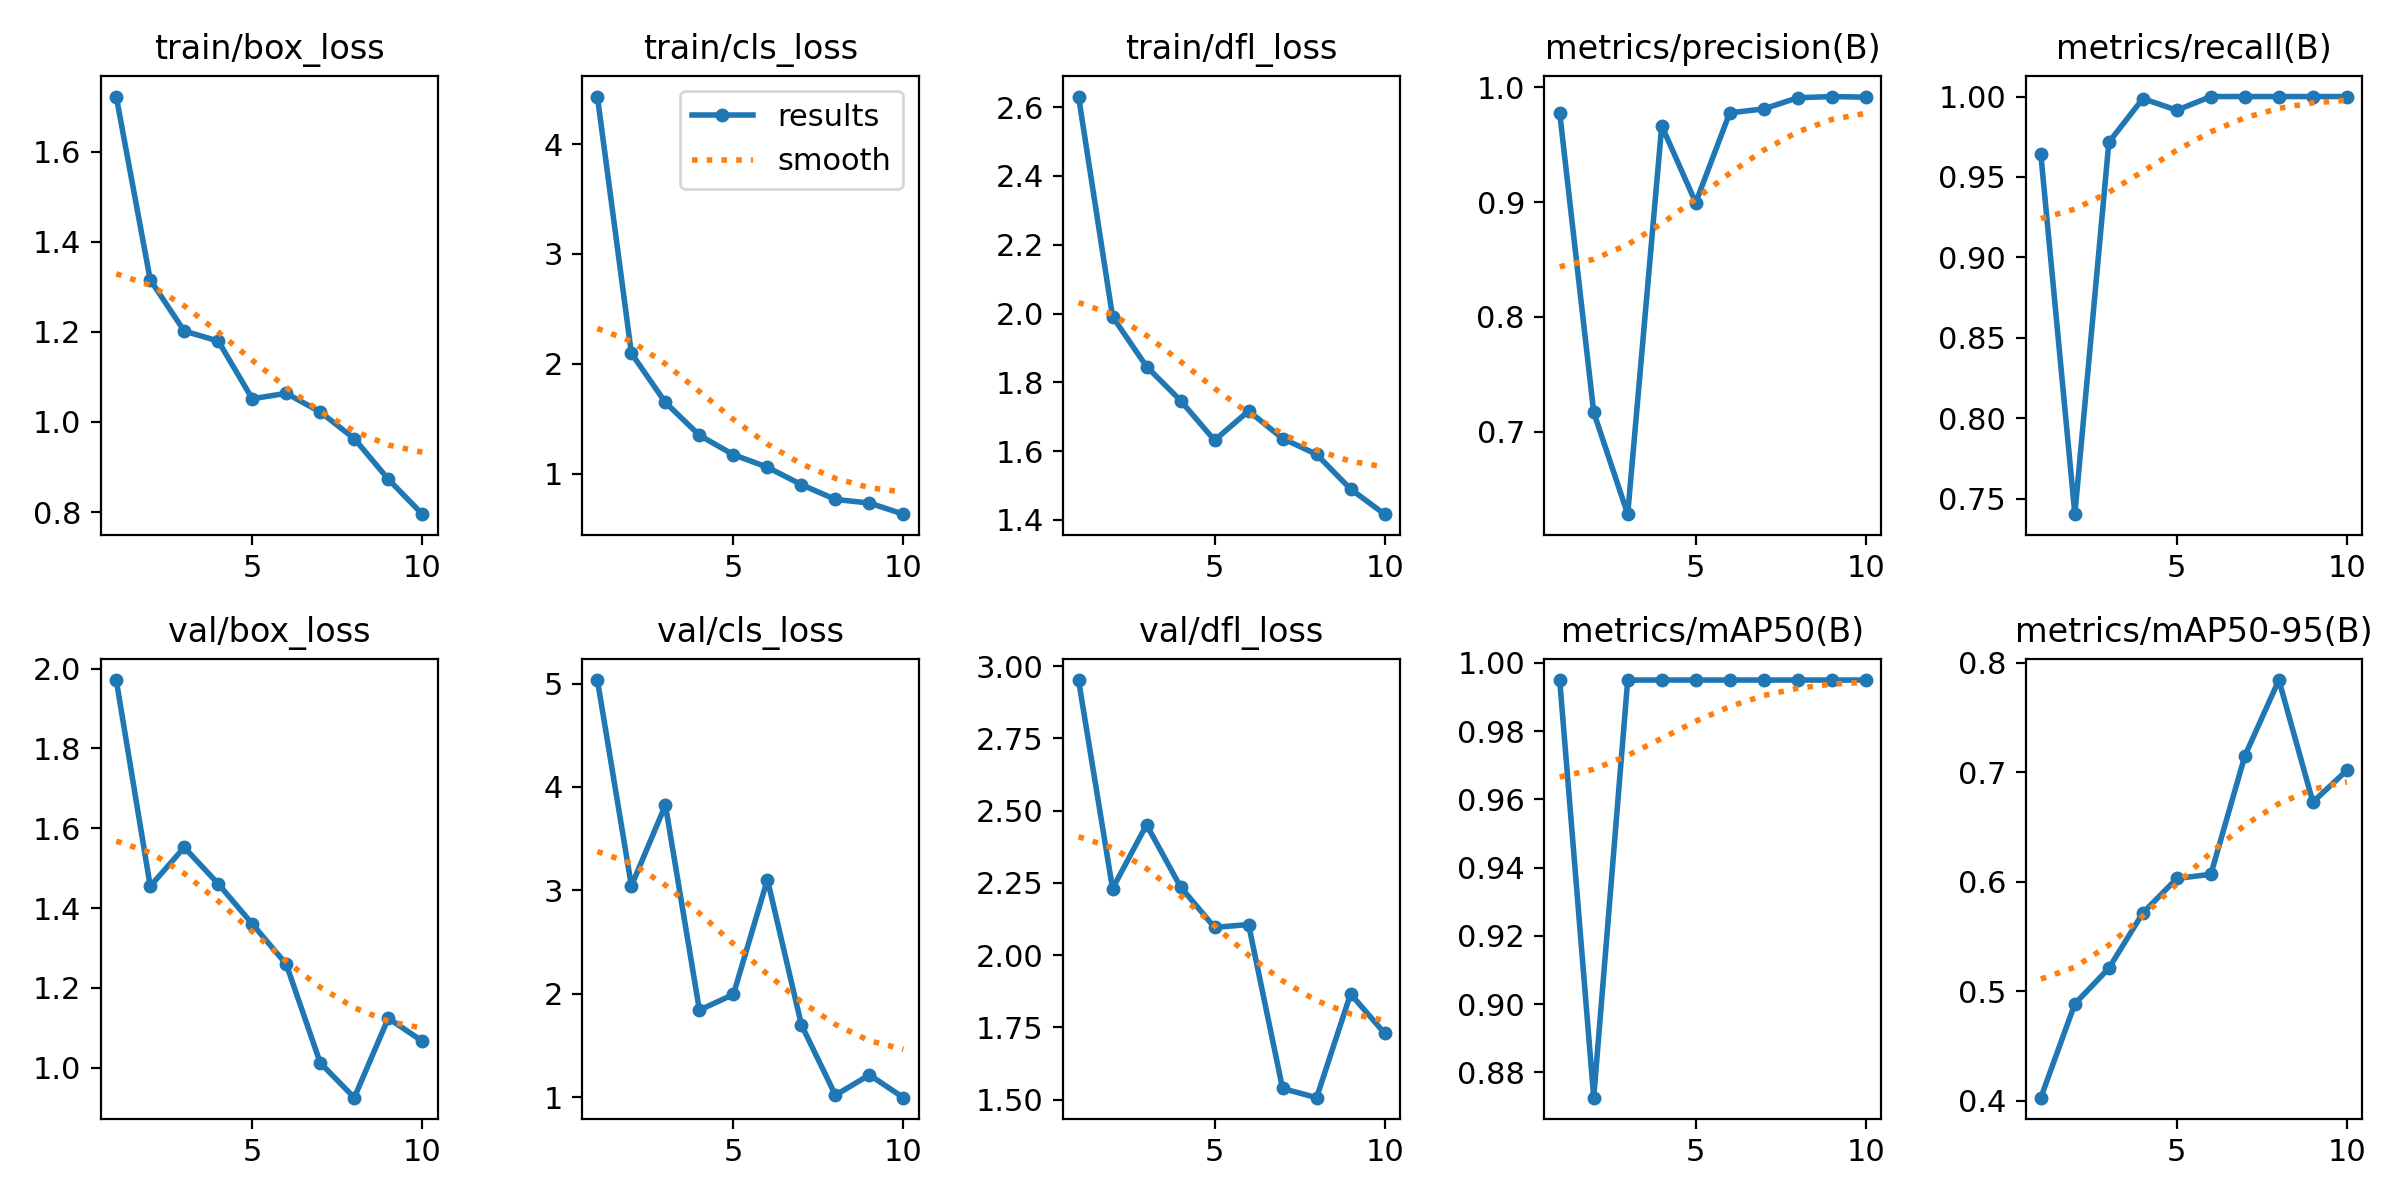

In [ ]:
Image(filename=f'/content/runs/detect/train10/results.png',width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train10/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/posture-corrector-1/valid/labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100% 14/14 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:13<00:00, 13.11s/it]
                   all         14         14      0.991      0.999      0.995       0.78
                   bad          6          6      0.983          1      0.995      0.779
                  good          8          8          1      0.998      0.995      0.781
Speed: 21.9ms preprocess, 888.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train10/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/7 /content/posture-corrector-1/test/images/IMG_20240618_210519_jpg.rf.78968f021b8e8462007ff2b4d0930de6.jpg: 640x640 1 good, 720.2ms
image 2/7 /content/posture-corrector-1/test/images/IMG_20240618_210526_jpg.rf.c9eedcb4a857da4b0be4755b3aa297bd.jpg: 640x640 1 good, 837.8ms
image 3/7 /content/posture-corrector-1/test/images/IMG_20240618_210527_jpg.rf.033eb31b5fdf73a11520afde98f2f73d.jpg: 640x640 1 good, 936.0ms
image 4/7 /content/posture-corrector-1/test/images/IMG_20240618_210547_jpg.rf.e2bc1fdcb6ae5a7c3c9cd9991be2cc68.jpg: 640x640 1 good, 915.5ms
image 5/7 /content/posture-corrector-1/test/images/IMG_20240618_210551_jpg.rf.e9f0149f7c7fe2d12fcf273437744aa1.jpg: 640x640 2 goods, 939.3ms
image 6/7 /content/posture-corrector-1/test/images/IMG_20240618_210620_jpg.rf.9de8a741d8e1305a998dc6f8f4ad50ed.jpg: 640x640 1 bad, 64

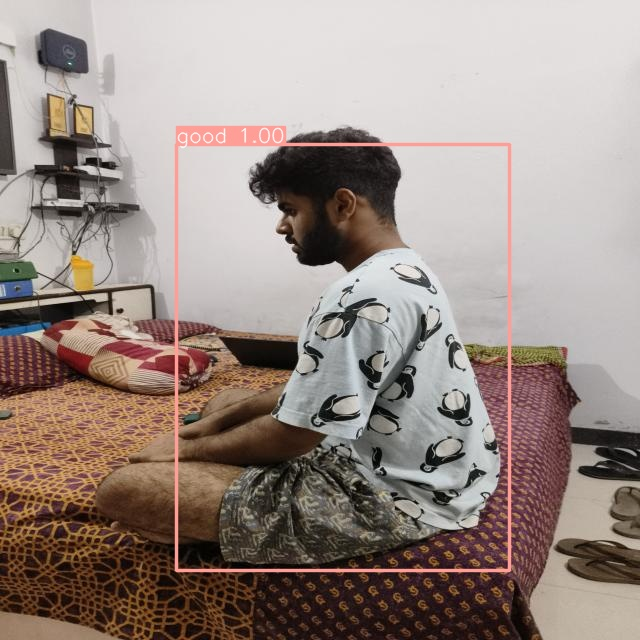

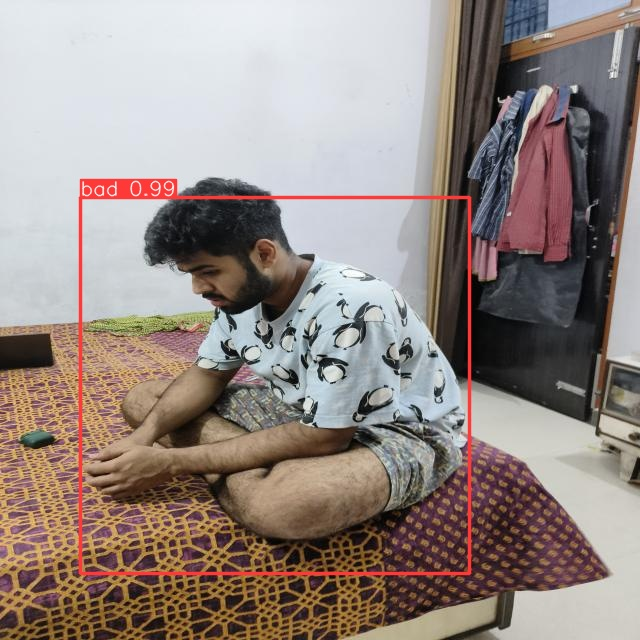

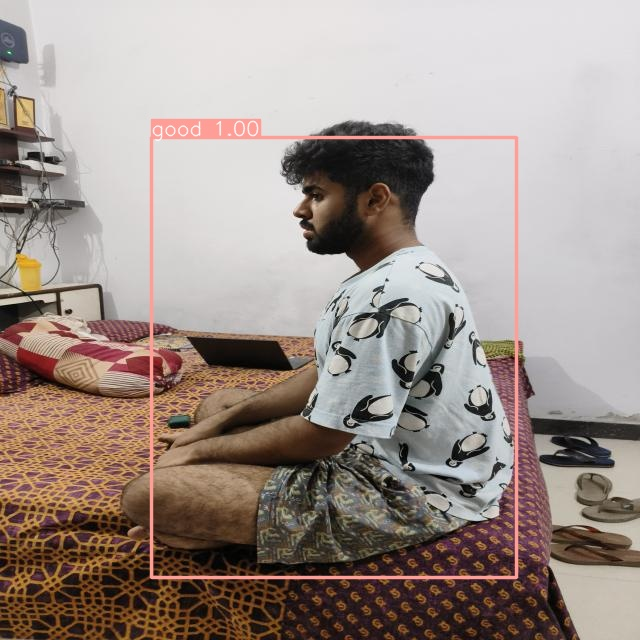

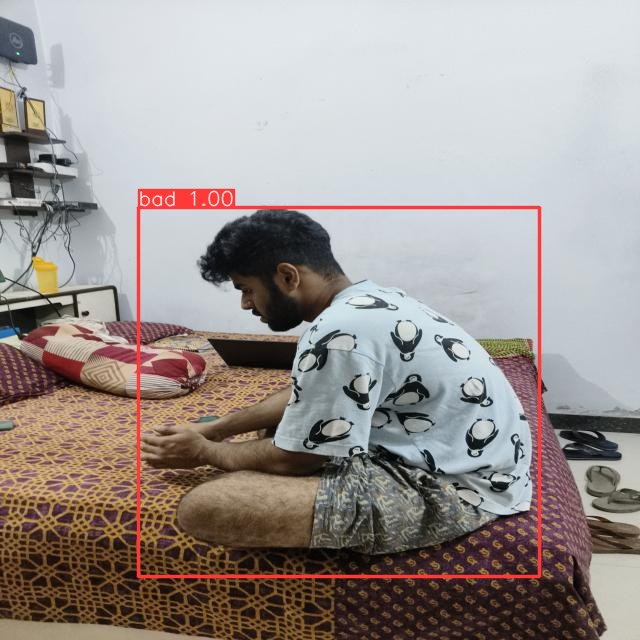

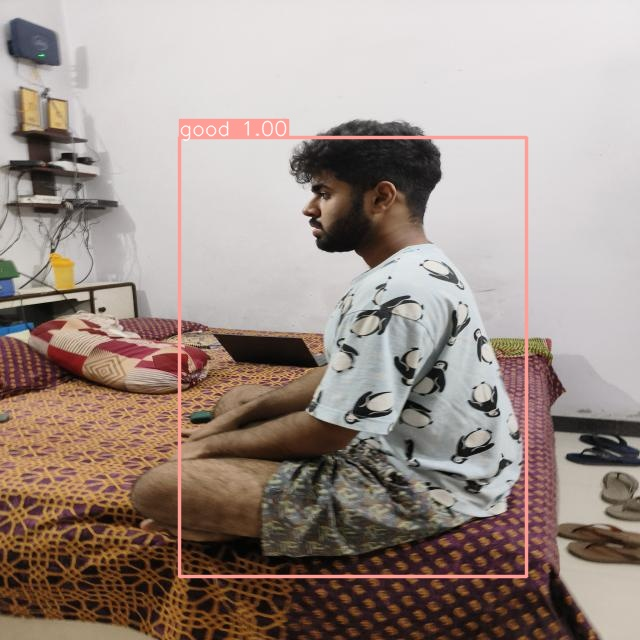

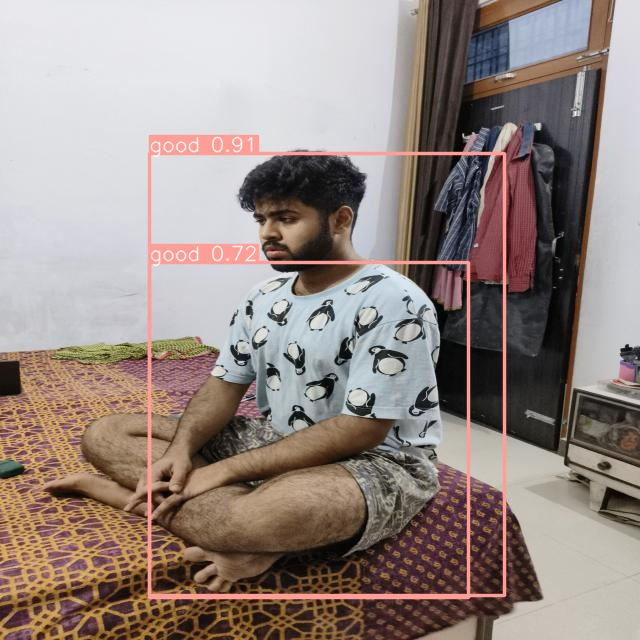

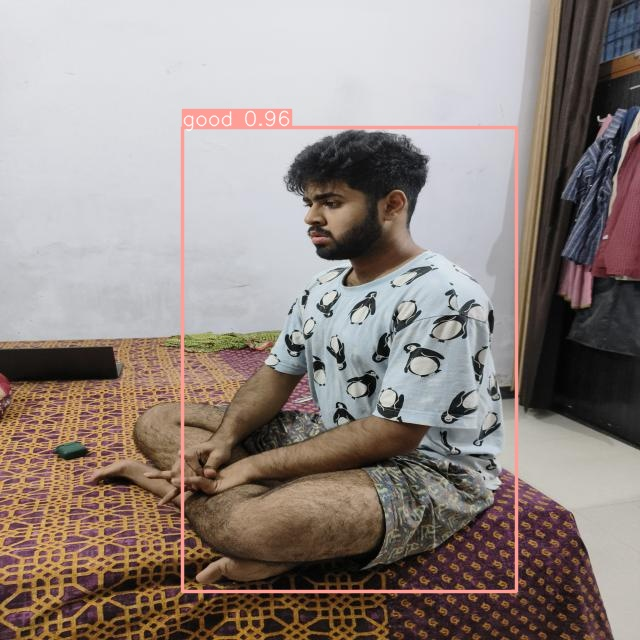

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path, height=600))
    print("\n")